In [722]:
import matplotlib.pyplot as plt
import sys

In [723]:
def graph(n, to_ignore=[], broadcast=[]):
    timings = []
    min_delivered = sys.maxsize
    for i in range(n):
        with open(f'logs/proc{i+1:02}.stderr', 'r') as f:
            lines = f.readlines()
        ms = [int(l.strip())*1e-3 for l in lines]

        p = plt.plot([x/1e6 for x in ms], range(len(ms)))
        if broadcast:
            plt.axvline(x=broadcast[i], color=p[0].get_color())
        timings.append(ms[-1]/len(ms))
        if i+1 not in to_ignore:
            min_delivered = min(len(ms), min_delivered)
    mean_timing = sum(timings)/len(timings)
    unit = 'µs'
    if mean_timing / 1000 > 1:
        mean_timing /= 1000
        unit = 'ms'
    print(f' - {mean_timing:.4} {unit} per delivered message (min. {min_delivered} messages delivered)')

## Tests 2020-10-25

 - 4.837 µs per delivered message (min. 20000000 messages delivered)


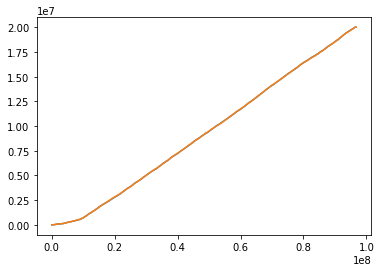

In [205]:
graph(2)

 - 347.6 µs per delivered message (min. 1000000 messages delivered)


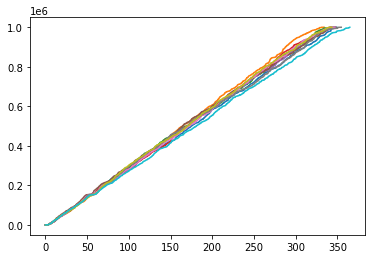

In [424]:
graph(10)

 - 215.3 ms per delivered message (min. 509 messages delivered)


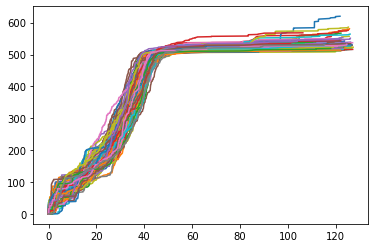

In [6]:
graph(128)

## Tests 2020-10-30

 - 6.706 µs per delivered message (min. 20000000 messages delivered)


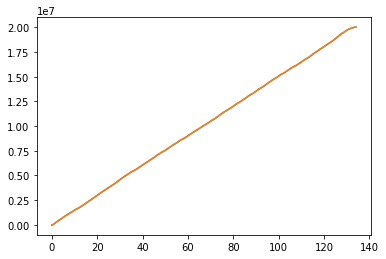

In [238]:
graph(2)

### Robin

Mémoire par process: env. 750 MB

Queue pour l'écriture sur disque: 10'000 places

 - 8.175 µs per delivered message (min. 20000000 messages delivered)


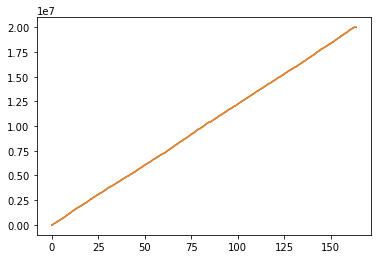

In [740]:
graph(2)

 - 174.6 µs per delivered message (min. 441536 messages delivered)


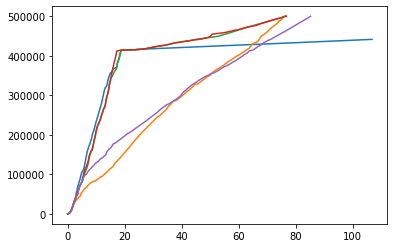

In [781]:
graph(5)

 - 263.5 µs per delivered message (min. 66454 messages delivered)


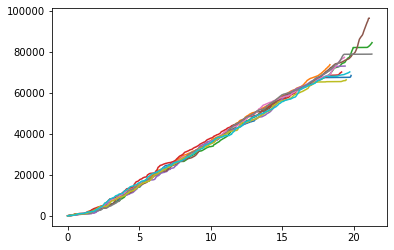

In [600]:
graph(10)

 - 2.415 ms per delivered message (min. 133795 messages delivered)


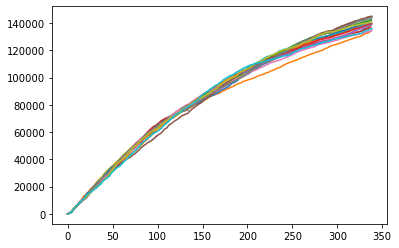

In [727]:
graph(20)

 - 118.1 ms per delivered message (min. 1280 messages delivered)


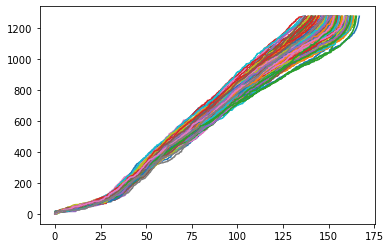

In [223]:
graph(128)